In [1]:
from sklearn import tree

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("data10.csv",header=None)
df.describe()

,0,1,2,3
count,273.000000,273.000000,273.000000,273.000000
mean,5.135531,5.450549,5.505495,0.622711
std,2.878665,2.883512,2.900457,0.485598
min,1.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,3.000000,0.000000
50%,5.000000,5.000000,6.000000,1.000000
75%,8.000000,8.000000,8.000000,1.000000
max,10.000000,10.000000,10.000000,1.000000


In [4]:
df.head()

,0,1,2,3
0,1,1,2,1
1,1,1,4,1
2,1,1,5,1
3,1,1,6,1
4,1,1,8,1


In [5]:
df[3].unique()

array([1, 0], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[[0,1,2]],df[3],test_size=0.35)

In [18]:
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
model.score(X_test,y_test)

1.0

In [20]:
model.feature_importances_

array([0.08889909, 0.17731705, 0.73378386])

In [21]:
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [22]:
y_predicted = model.predict(X_test)

### Confusion Matrix

<AxesSubplot:>

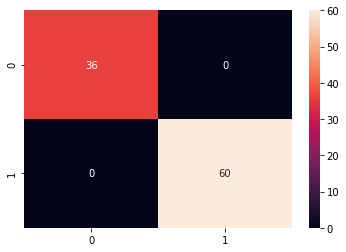

In [23]:
cm1 = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm1, annot=True)

### Performance Measure

In [24]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        60

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



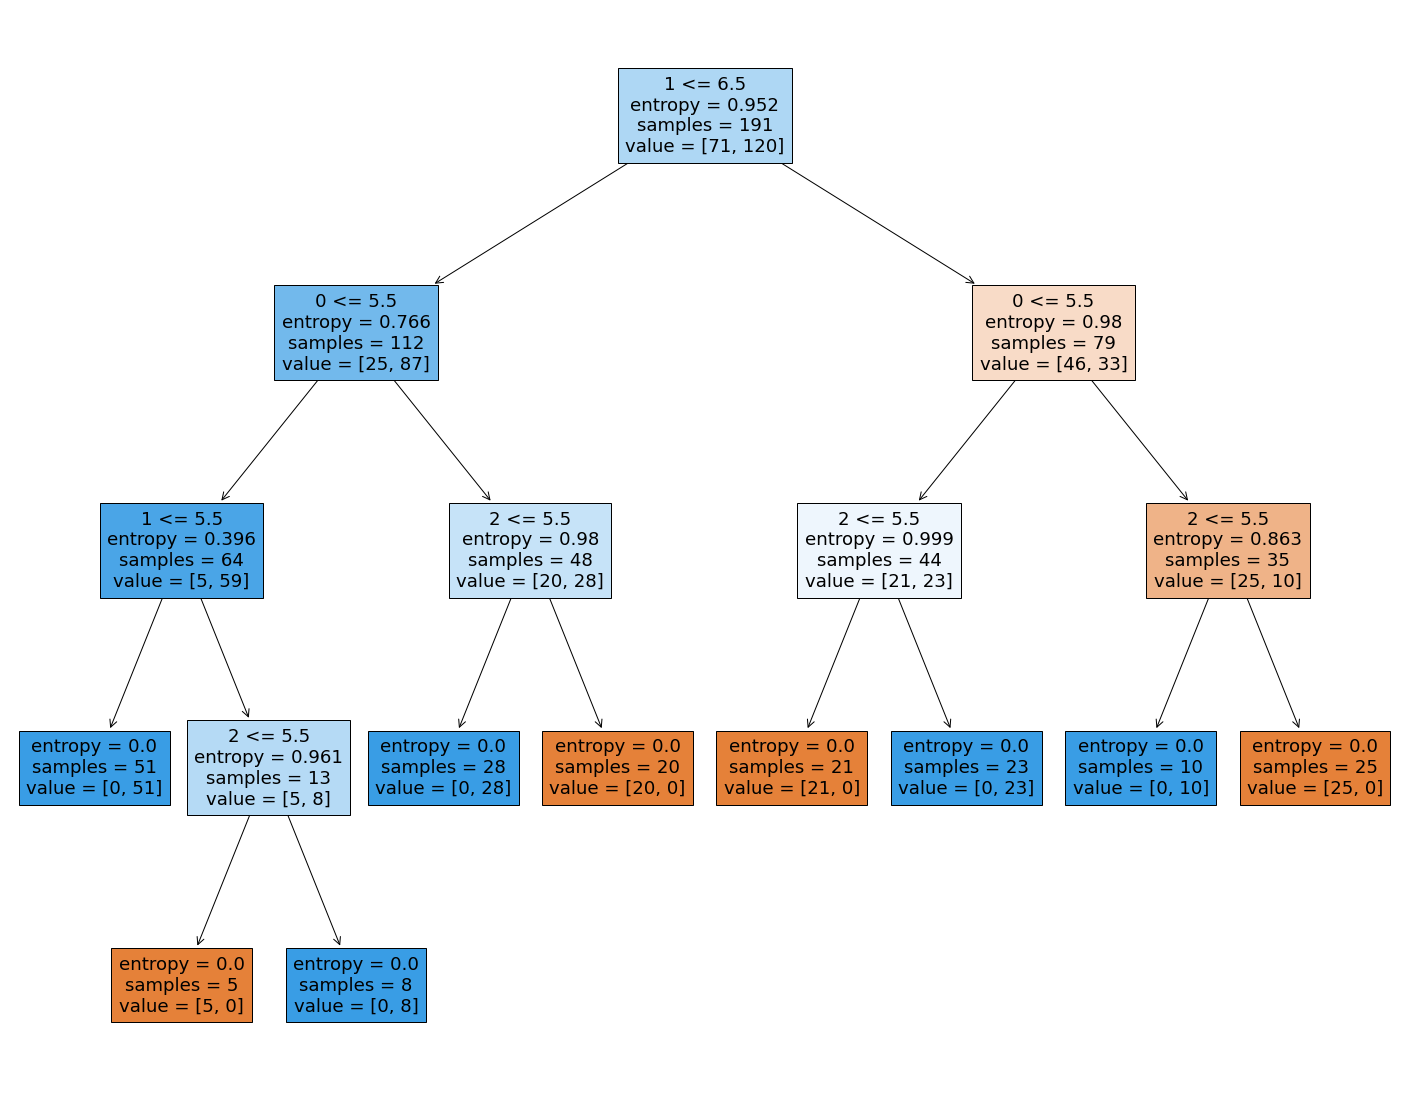

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=[0,1,2], filled=True)